In [1]:
#instalacion de paquetes


In [2]:
library(readr)
library(readxl)
library(olsrr)
library(dplyr)
#library(mtcars)
library(ggplot2)
library(MASS)


Attaching package: 'olsrr'


The following object is masked from 'package:datasets':

    rivers



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


The following object is masked from 'package:olsrr':

    cement




In [3]:
InsData <- read.csv("C:/Users/gusta/JupyterLab/Econometria/DataBase INSURANCE/Insurance_EDITADO")
InsData <- InsData[,c(2,3,4,5,6,7,8,9)]

In [4]:
head(InsData)

,charges,age,sex,bmi,bmiSQ,children,smoker,region
,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
1,16884.924,19,1,27.900,778.4100,0,1,0
2,1725.552,18,0,33.770,1140.4129,1,0,1
3,4449.462,28,0,33.000,1089.0000,3,0,1
4,21984.471,33,0,22.705,515.5170,0,0,2
5,3866.855,32,0,28.880,834.0544,0,0,2
6,3756.622,31,1,25.740,662.5476,0,0,1


## Realizamos analisis exploratorio ploteando histogramas y boxplot

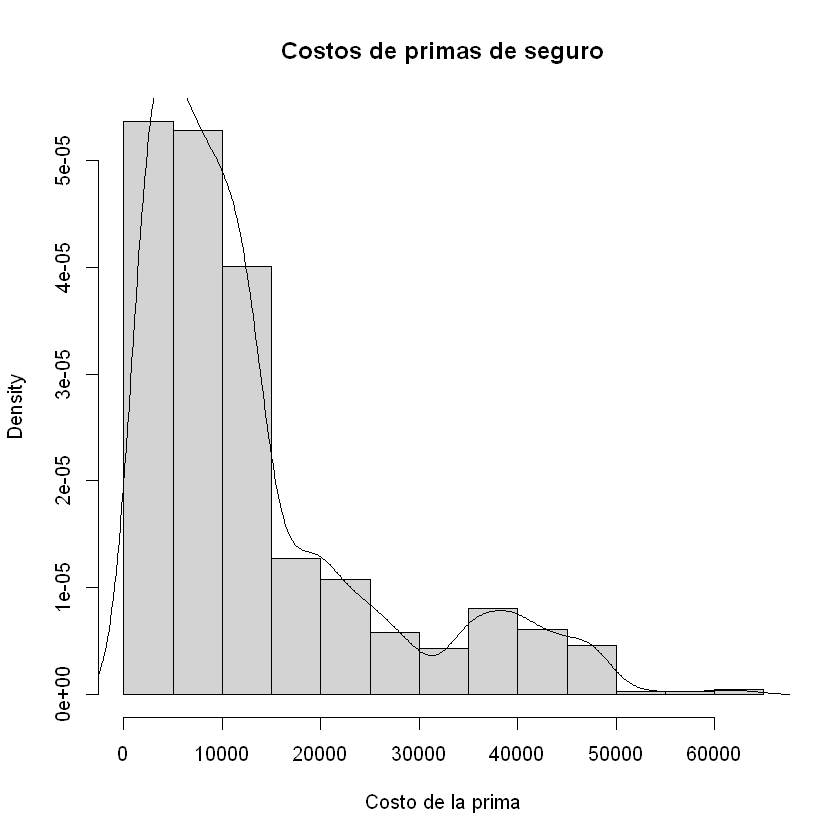

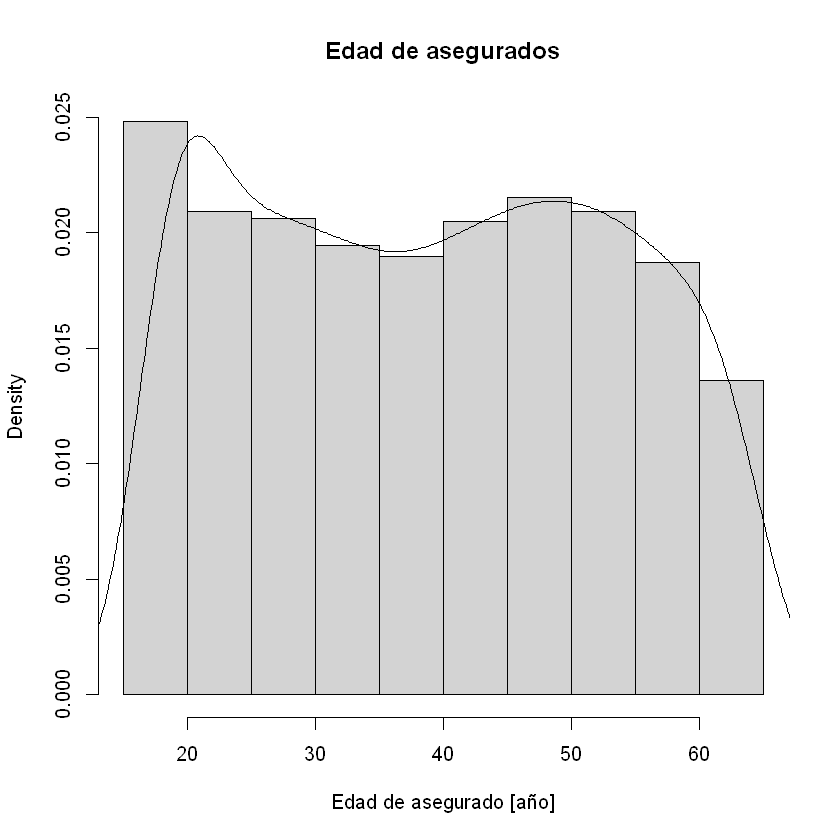

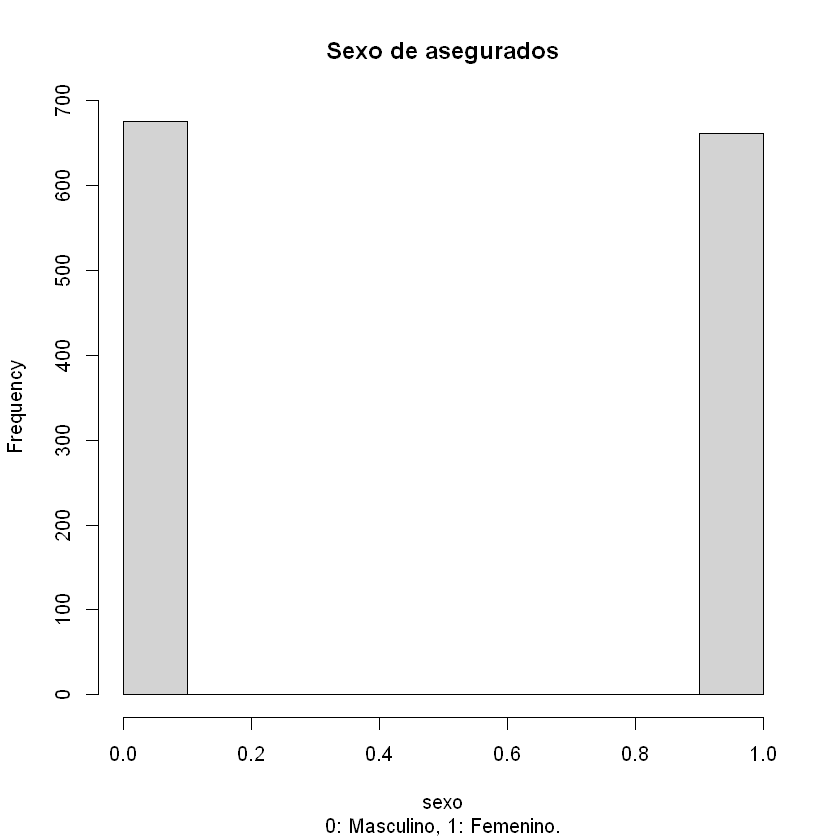

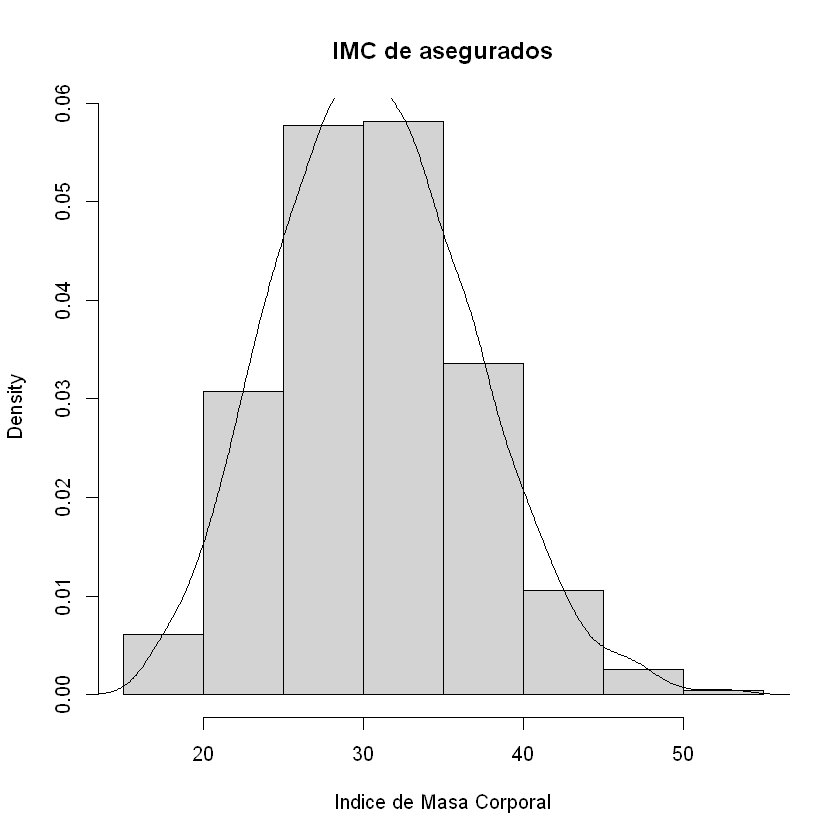

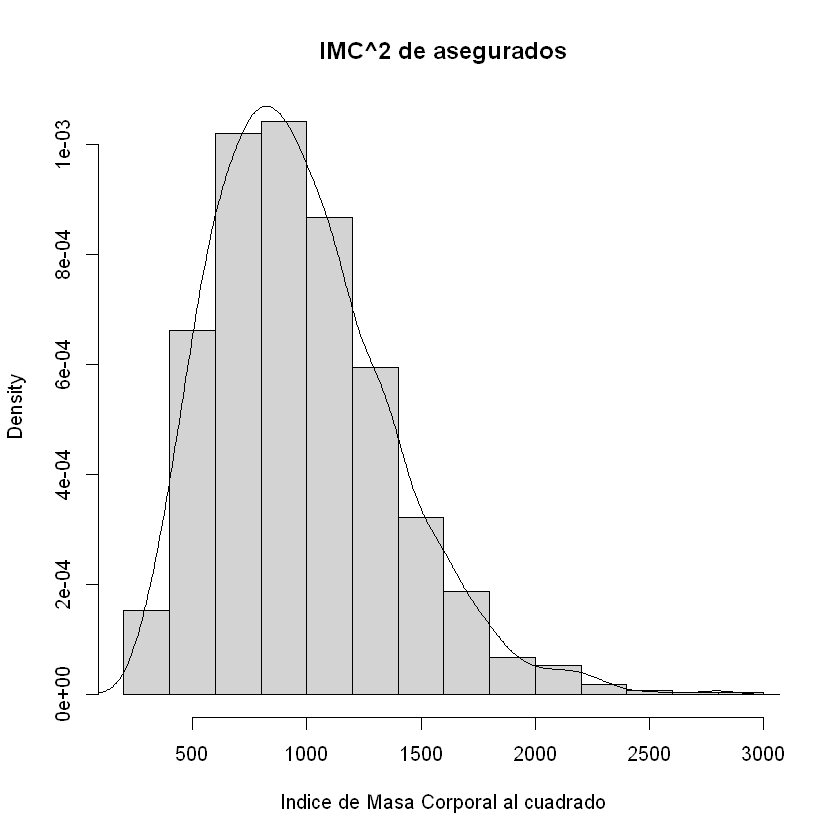

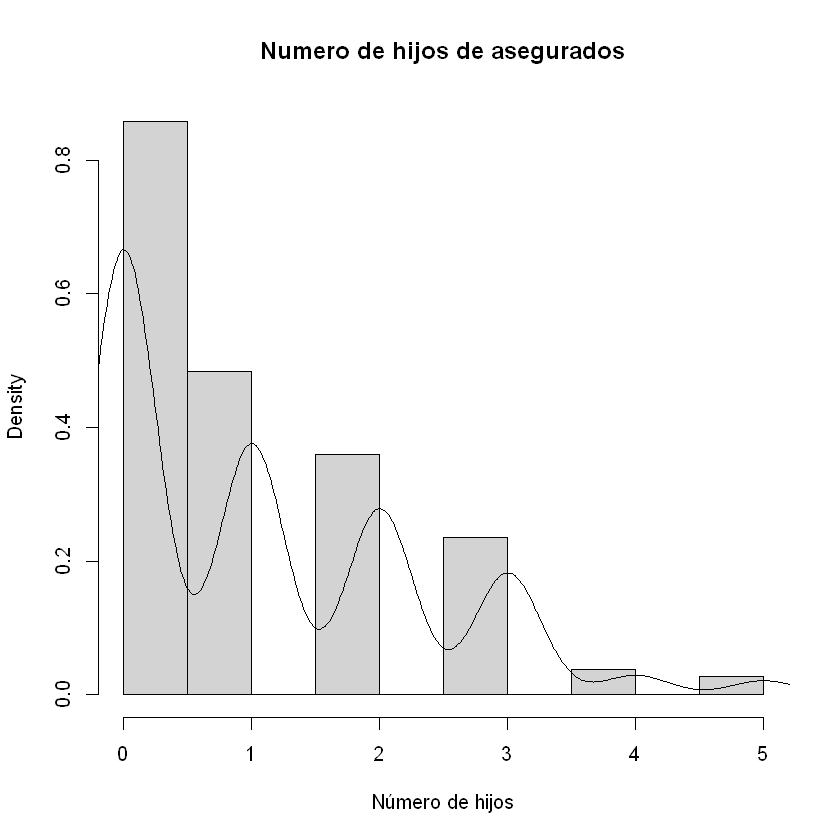

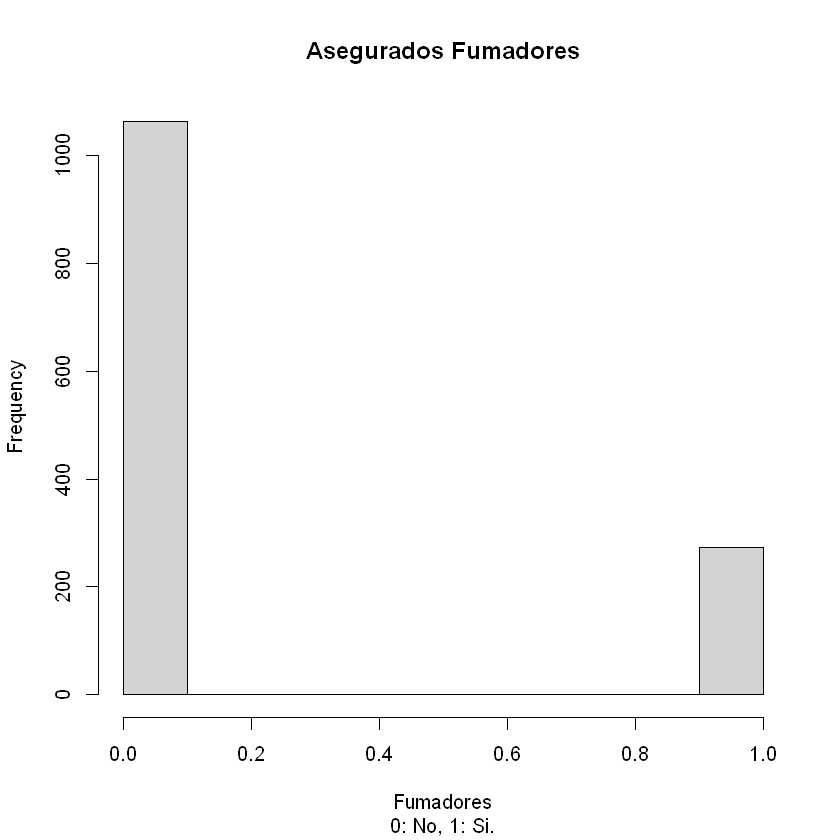

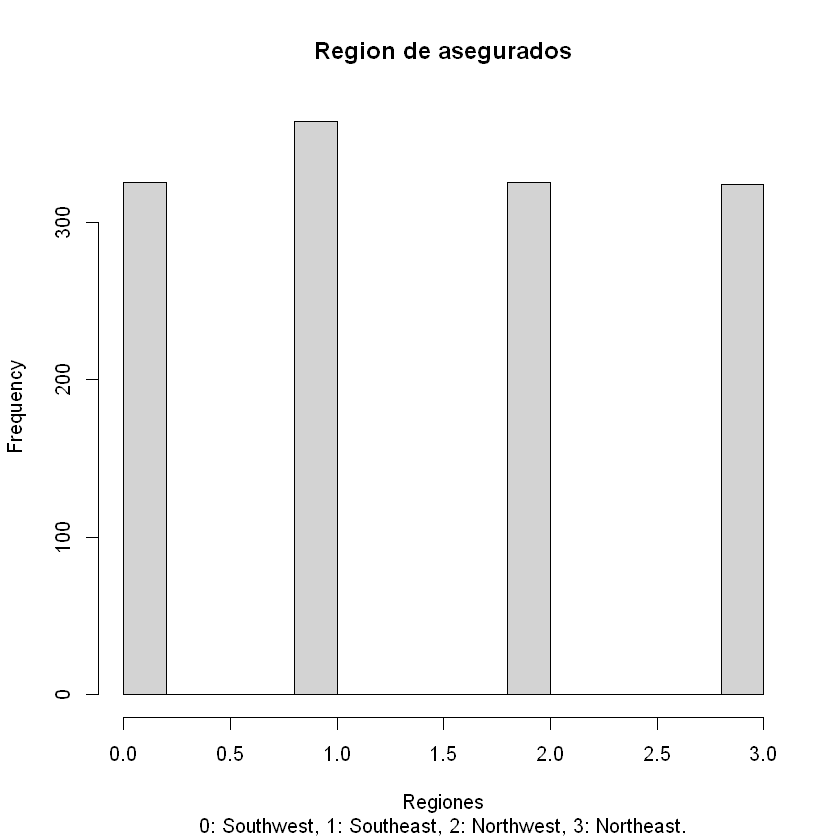

In [5]:
#histout=apply(InsData,2,hist)
hist_charge <- hist(InsData$charges, main="Costos de primas de seguro",
        xlab="Costo de la prima",
        prob = TRUE)
lines(density(InsData$charges))


hist_age <- hist(InsData$age, main="Edad de asegurados",
        xlab="Edad de asegurado [año]",
        prob = TRUE)
lines(density(InsData$age))



hist_sex <- hist(InsData$sex, main="Sexo de asegurados",
        xlab="sexo",
        sub= "0: Masculino, 1: Femenino.")


hist_bmi <- hist(InsData$bmi, main="IMC de asegurados",
        xlab="Indice de Masa Corporal",
        prob = TRUE)
lines(density(InsData$bmi))



hist_bmiSQ <- hist(InsData$bmiSQ, main="IMC^2 de asegurados",
        xlab="Indice de Masa Corporal al cuadrado",
        prob = TRUE)
lines(density(InsData$bmiSQ))


hist_children <- hist(InsData$children, main="Numero de hijos de asegurados",
        xlab="Número de hijos",
        prob = TRUE)
lines(density(InsData$children))


hist_smoker <- hist(InsData$smoker, main="Asegurados Fumadores",
        xlab="Fumadores",
        sub= "0: No, 1: Si.")


hist_region <- hist(InsData$region, main="Region de asegurados",
        xlab="Regiones",
        sub= "0: Southwest, 1: Southeast, 2: Northwest, 3: Northeast.")

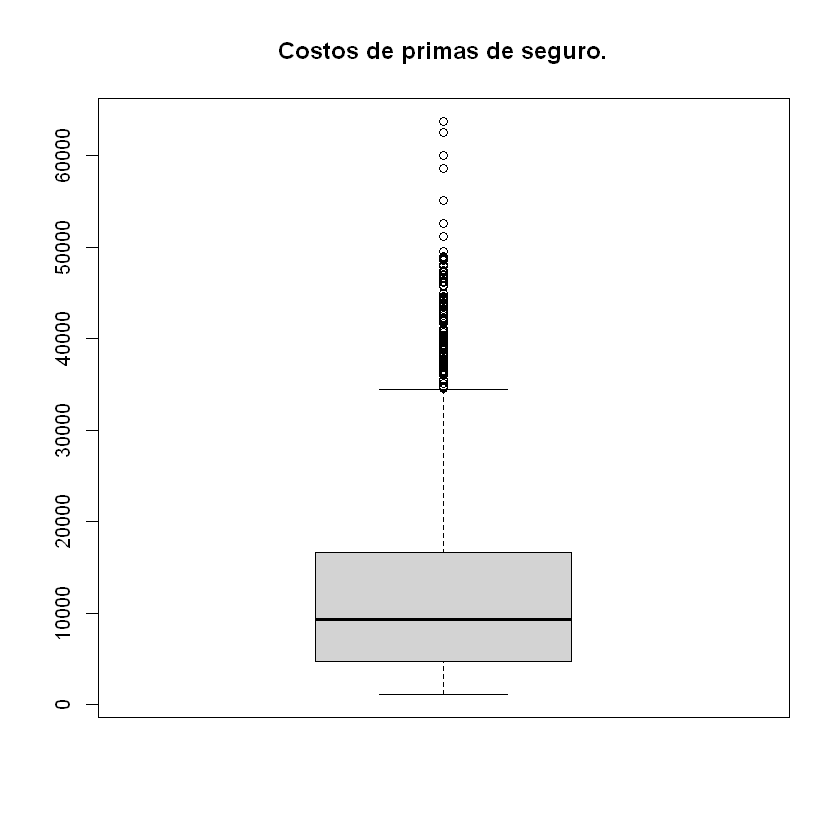

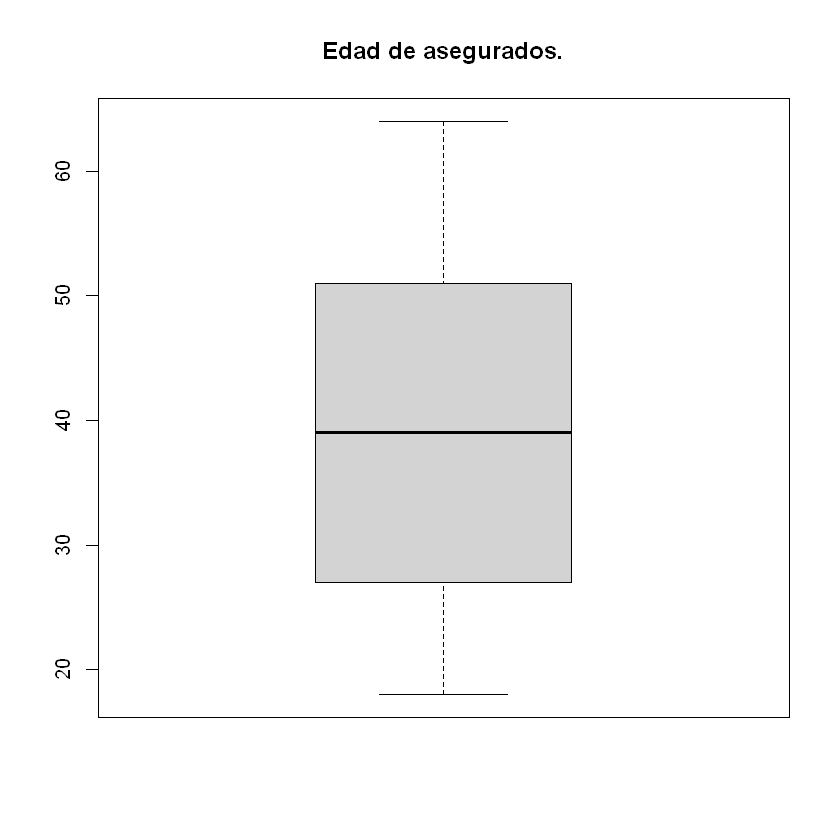

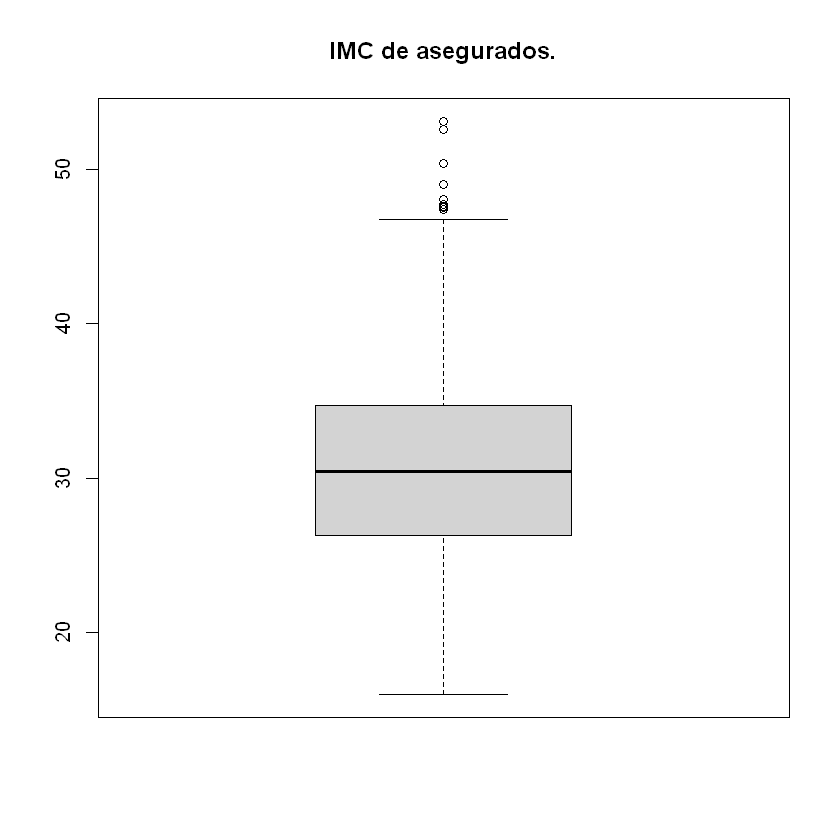

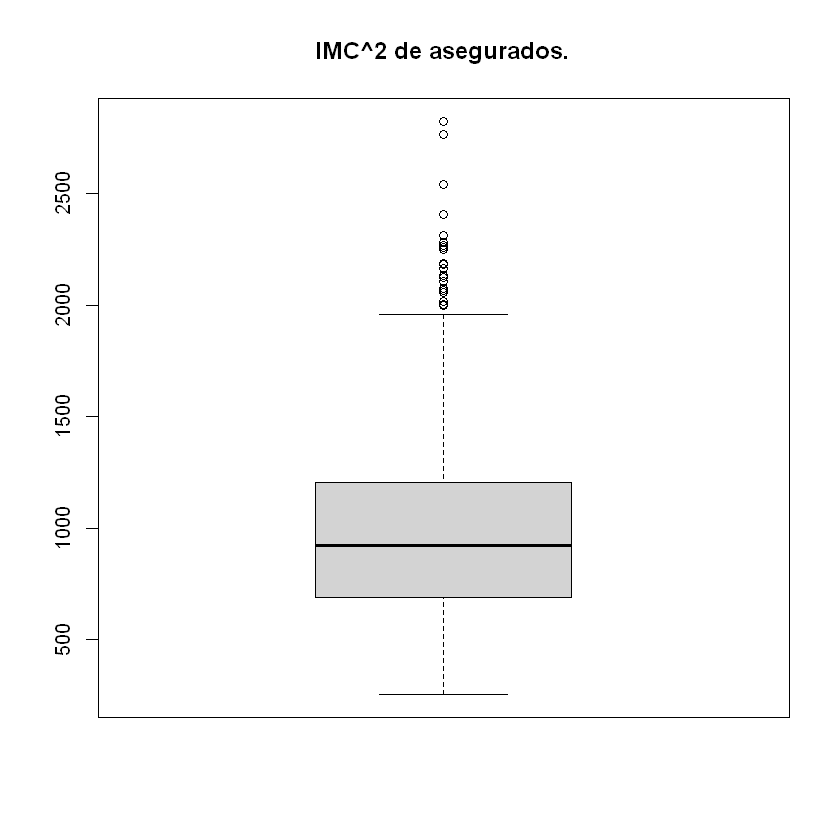

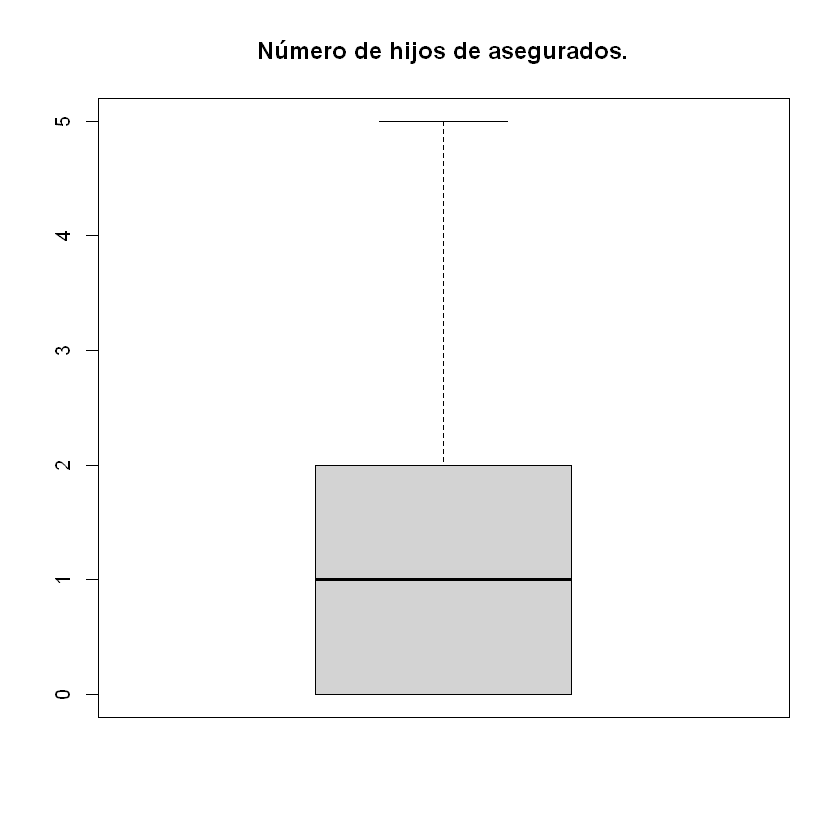

In [6]:
box_charge <- boxplot(InsData$charges, main="Costos de primas de seguro.")
box_age <- boxplot(InsData$age, main="Edad de asegurados.")
box_bmi <- boxplot(InsData$bmi, main="IMC de asegurados.")
box_bmiSQ <- boxplot(InsData$bmiSQ, main= "IMC^2 de asegurados.")
box_children <- boxplot(InsData$children, main= "Número de hijos de asegurados.")

## Regresiones de Costo para cada variable

In [71]:
regresion_age   <- lm(InsData$charges ~ InsData$age  , data = InsData)
regresion_sex   <- lm(InsData$charges ~ InsData$sex  , data = InsData)
regresion_bmi  <- lm(InsData$charges ~ InsData$bmi  , data = InsData)
regresion_bmiSQ   <- lm(InsData$charges ~ InsData$bmiSQ  , data = InsData)
regresion_children   <- lm(InsData$charges ~ InsData$children  , data = InsData) 
regresion_smoker   <- lm(InsData$charges ~ InsData$smoker  , data = InsData)
regresion_region   <- lm(InsData$charges ~ InsData$region  , data = InsData)

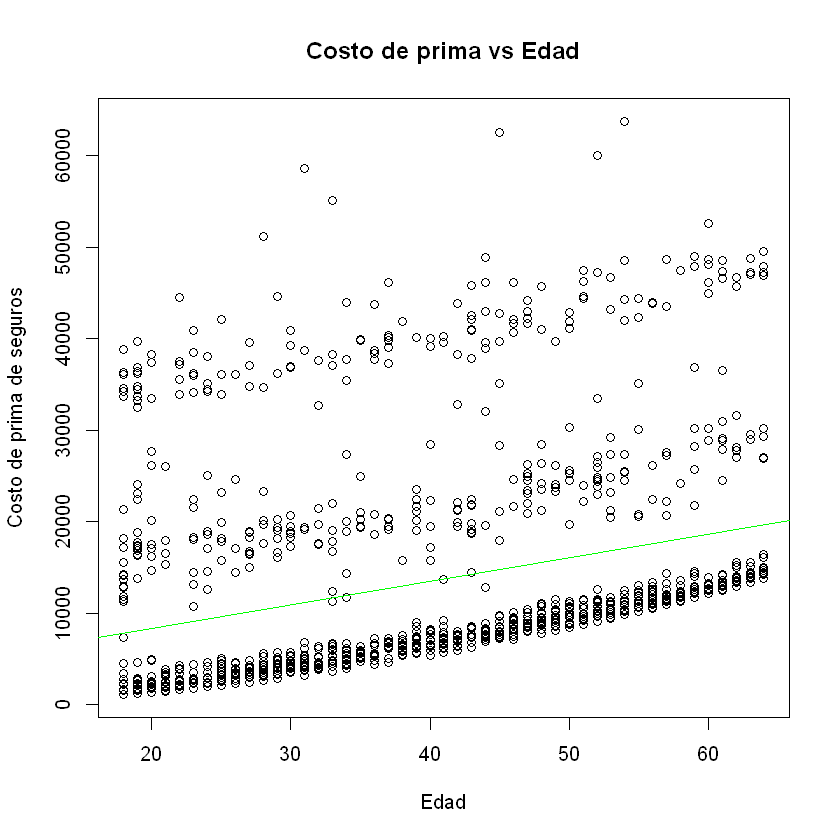

In [72]:
plot(InsData$age , InsData$charges, xlab='Edad', ylab='Costo de prima de seguros', main='Costo de prima vs Edad')
abline(regresion_age, col="green")

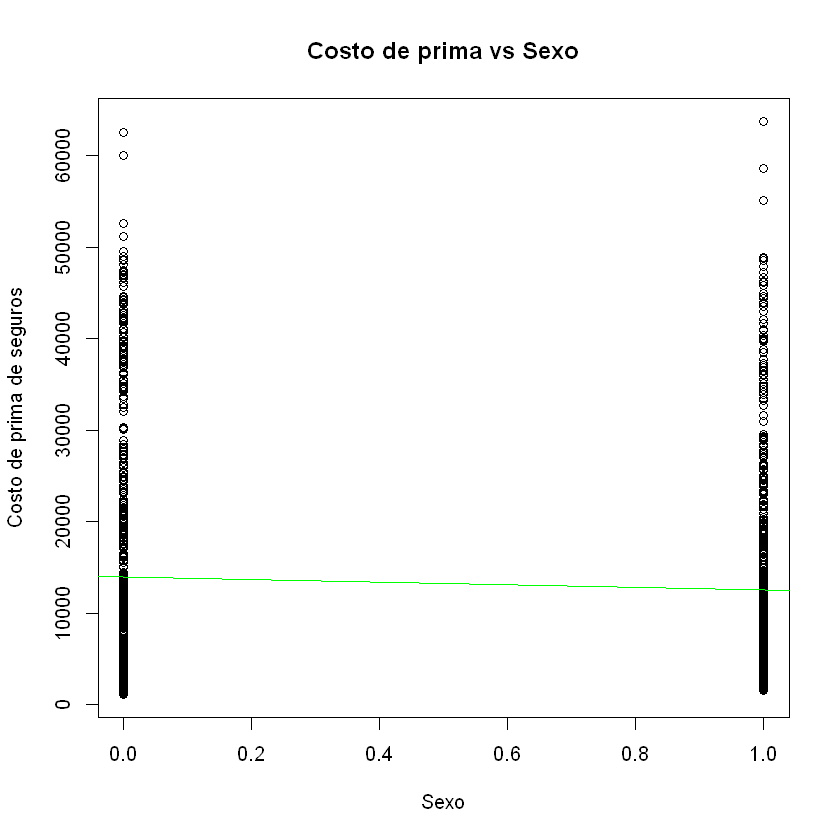

In [73]:
plot(InsData$sex , InsData$charges, xlab='Sexo', ylab='Costo de prima de seguros', main='Costo de prima vs Sexo')
abline(regresion_sex, col="green")
#hacer regresion logistica

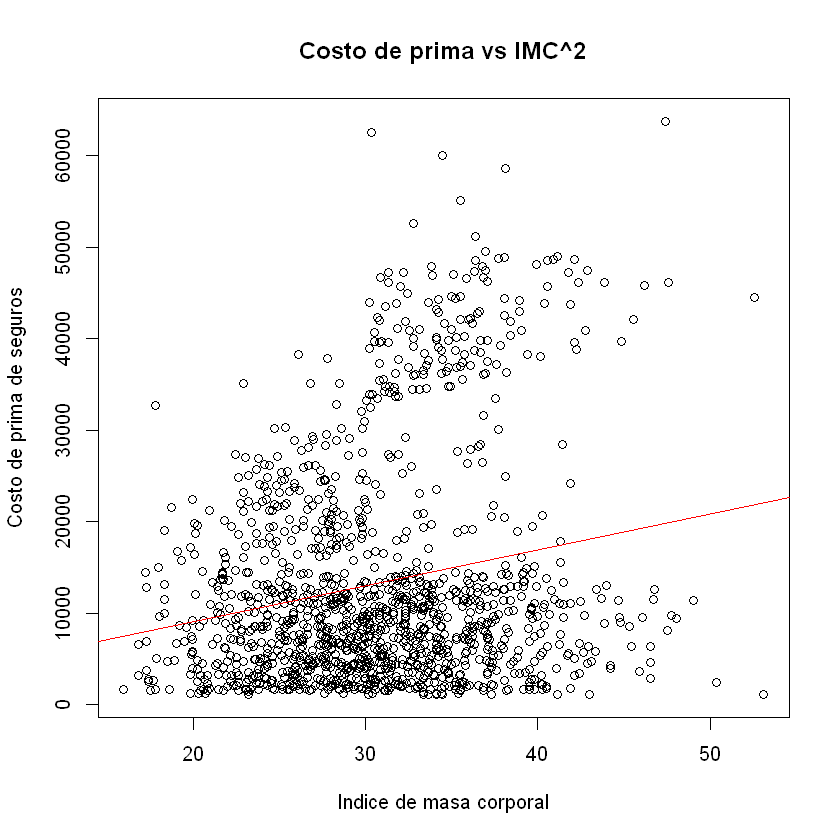

In [74]:
plot(InsData$bmi , InsData$charges, xlab='Indice de masa corporal', ylab='Costo de prima de seguros', main='Costo de prima vs IMC^2')
abline(regresion_bmi, col="red")

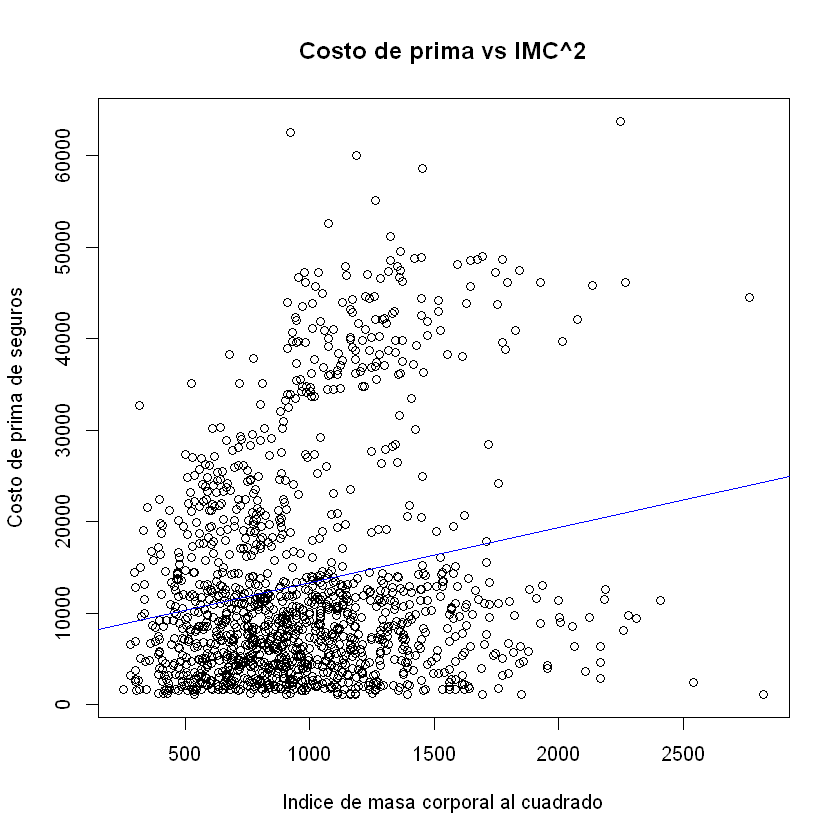

In [75]:
plot(InsData$bmiSQ , InsData$charges, xlab='Indice de masa corporal al cuadrado', ylab='Costo de prima de seguros', main='Costo de prima vs IMC^2')
abline(regresion_bmiSQ, col="blue")

### Comparemos estas ultimas dos regresiones en un mismo grafico reescalado

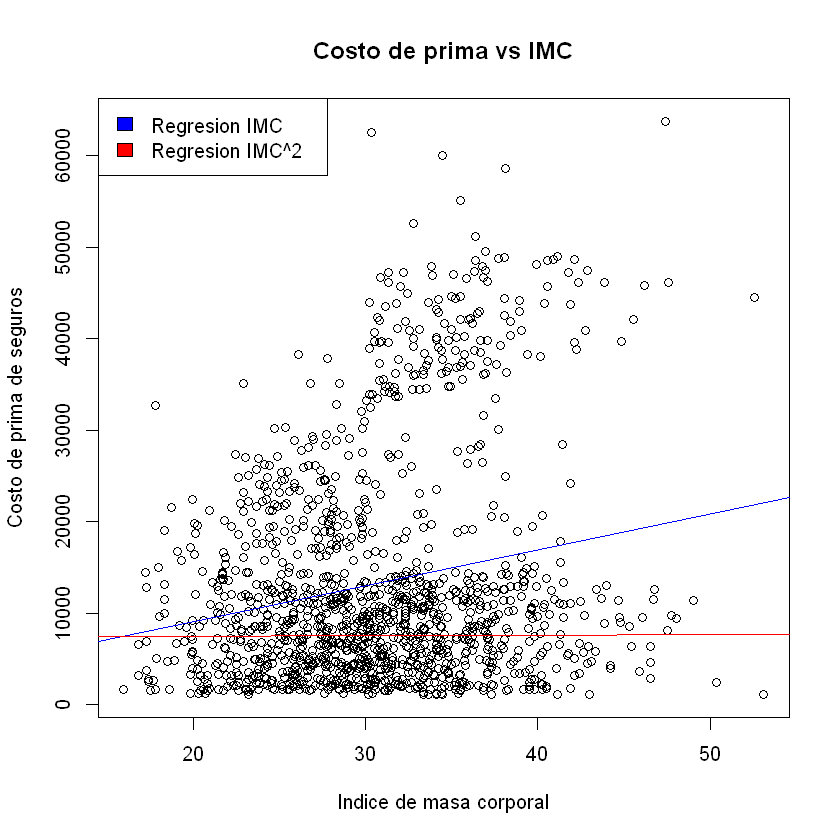

In [76]:
plot(InsData$bmi, InsData$charges, xlab='Indice de masa corporal', ylab='Costo de prima de seguros', main='Costo de prima vs IMC')
abline(regresion_bmi, col="blue")

abline(regresion_bmiSQ, col="red")
legend(x="topleft", legend= c("Regresion IMC", "Regresion IMC^2"), fill=c("blue", "red"))

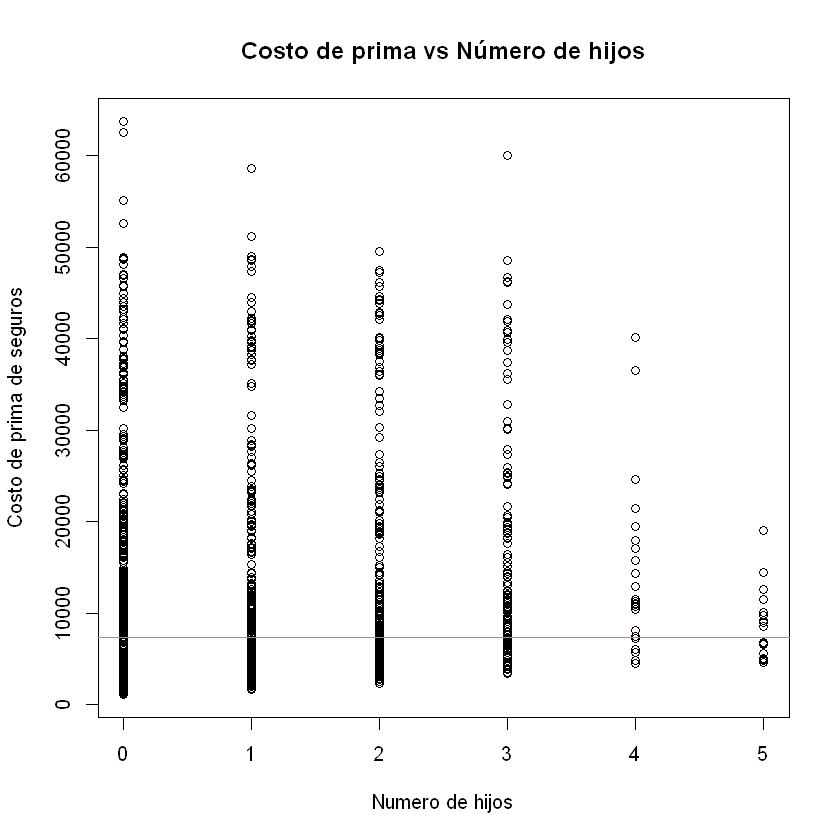

In [77]:
plot(InsData$children , InsData$charges, xlab='Numero de hijos', ylab='Costo de prima de seguros', main='Costo de prima vs Número de hijos')
abline(regresion_bmiSQ, col="green")

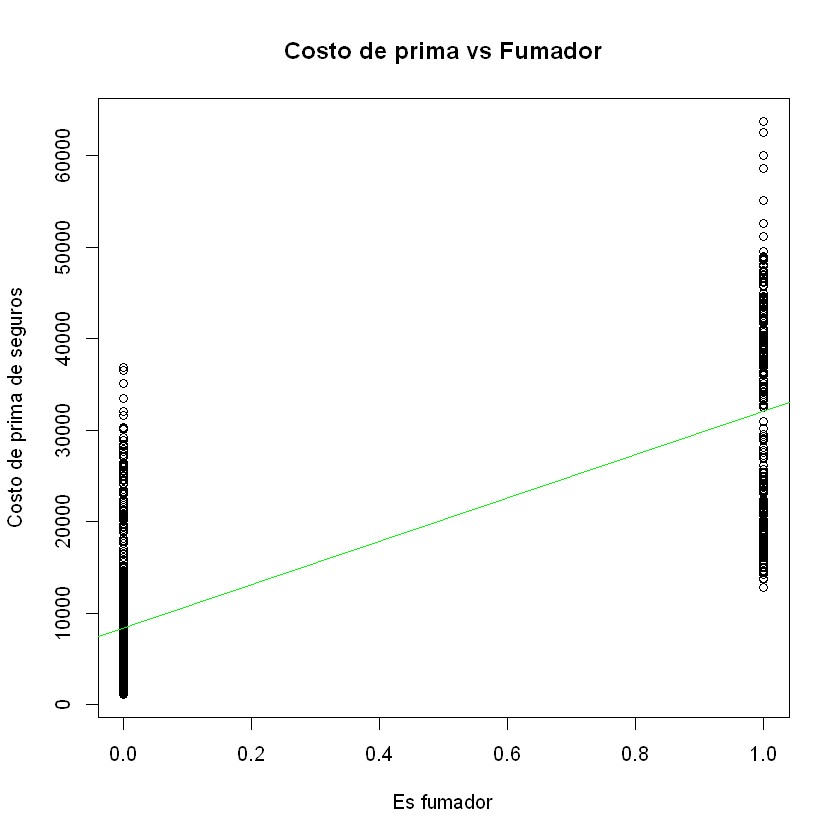

In [78]:
plot(InsData$smoker , InsData$charges, xlab='Es fumador', ylab='Costo de prima de seguros', main='Costo de prima vs Fumador')
abline(regresion_smoker, col="green")

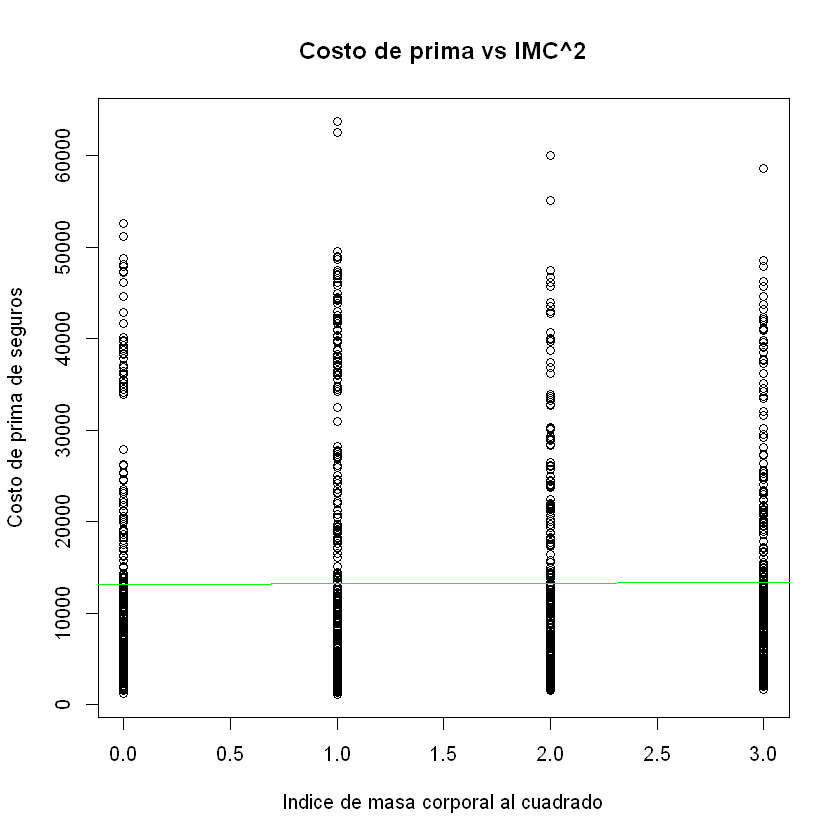

In [79]:
plot(InsData$region , InsData$charges, xlab='Indice de masa corporal al cuadrado', ylab='Costo de prima de seguros', main='Costo de prima vs IMC^2')
abline(regresion_region, col="green")

### Veamos los estimadores de correlacion del Costo con las demás variables

In [8]:
a = c()
for (i in InsData){       
       a = cbind(a, cor.test(InsData$charge, i, method= c("pearson", "kendall", "spearman")))
    }

In [9]:
names(InsData)

[1] "charges"  "age"      "sex"      "bmi"      "bmiSQ"    "children" "smoker"  
[8] "region"

In [10]:
print(a)

            [,1]                                  
statistic   Inf                                   
parameter   1336                                  
p.value     0                                     
estimate    1                                     
null.value  0                                     
alternative "two.sided"                           
method      "Pearson's product-moment correlation"
data.name   "InsData$charge and i"                
conf.int    numeric,2                             
            [,2]                                  
statistic   11.45312                              
parameter   1336                                  
p.value     4.886693e-29                          
estimate    0.2990082                             
null.value  0                                     
alternative "two.sided"                           
method      "Pearson's product-moment correlation"
data.name   "InsData$charge and i"                
conf.int    numeric,2          

In [11]:
model <- lm(charges ~ age + sex + bmi + bmiSQ + children + smoker + region, data=InsData)

In [12]:
res <- ols_step_all_possible(model) #este lo aprendí de mi buen amigo Richi.

### RES corresponde a las combinaciones de variables explicativas y sus resultantes indicadores de bondad de ajuste para el MRL

In [69]:
res

,mindex,n,predictors,rsquare,adjr,predrsq,cp,aic,sbic,sbc,msep,fpe,apc,hsp
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,1,1,smoker,6.197648e-01,0.619480208,0.6180369630,702.85205,27667.46,23868.78,27683.06,74665926332,55887544,0.3813736,41800.85
1,2,1,age,8.940590e-02,0.088724317,0.0866794766,3543.89014,28835.95,25034.91,28851.55,178811311166,133840503,0.9133204,100105.42
3,3,1,bmi,3.933914e-02,0.038620082,0.0362113860,3812.08884,28907.56,25106.43,28923.16,188642807938,141199391,0.9635371,105609.47
4,4,1,bmiSQ,3.724152e-02,0.036520890,0.0338627746,3823.32542,28910.48,25109.34,28926.08,189054713255,141507702,0.9656410,105840.07
5,5,1,children,4.623759e-03,0.003878717,0.0017935950,3998.05294,28955.06,25153.86,28970.66,195459789076,146301910,0.9983564,109425.88
2,6,1,sex,3.282380e-03,0.002536334,0.0003007149,4005.23846,28956.86,25155.66,28972.46,195723192541,146499068,0.9997018,109573.34
7,7,1,region,3.854218e-05,-0.000709932,-0.0028213039,4022.61513,28961.21,25160.01,28976.81,196360177740,146975852,1.0029554,109929.95
12,8,2,age smoker,7.214008e-01,0.720983449,0.7195887960,160.40607,27253.32,23455.60,27274.12,54748902289,41010184,0.2798513,30673.49
21,9,2,bmi smoker,6.579420e-01,0.657429548,0.6560015549,500.34371,27527.89,23729.05,27548.69,67219511285,50351412,0.3435953,37660.25
